# Quick review of probability and statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import scipy.stats

Probability is the foundation for statistics so let's briefly review some basics. Out of necessity, lots of details will get skipped. We won't dwelll on probability for too long but it's essential to build basic intuition and understanding before moving on to statistical models.

We start with the basic setup of an experiment whose outcome is uncertain: a random experiment. We want to consider the possible outcomes of such an experiment along with a measure of how likely each outcome is to occur. Some examples: 

1. Flip a coin
2. Roll a fair six-sided die
3. Roll a pair of dice
4. Flip a coin until you get heads.
5. Pick a random number between 0 and 1

We define the **sample space** to be the set of all possible outcomes of the experiment. In the examples above we have the following sample spaces:

1. $\{H,T\}$
2. $\{1,2,3,4,5,6\}$
3. The set of 36 possible combinations of the two dice... like one 3 and the other 5.
4. $\{H,TH,TTH,TTTH,\ldots \}$
5. The interval $\left[0,1 \right]$

We all have an intuitive notion of probability as quantifying the likelihood that an event will occur. As such, probabilities follow some obvious rules: a probability must be positive and be between 0 (the even is certain to not occur) and 1 (the event is certain to occur). 

Let's notice that in each of the first 3 examples, there is a finite number of possible outcomes. Moreover, each outcome in the sample space is equally likely to occur. In that case we can define the probability of an **event**, a subspace of the sample space, to be the number of outtcomes corresponding to the event divided by the number of outcomes in the" sample space. 

In example 1, we get the non-suprising result that the probability of flipping H is $\frac{1}{2}$. 

In the second example, let $E$ be the event that we roll a 5 or 6. Then $P(E)=\frac{2}{6}=\frac{1}{3}$.

In the third example it's convenient to think of the dice as having different colors. We can write out the sample space as follows:

| R\B   |   1  |  2 | 3|4|5|6|
|-------|------|----|-|-|-|-|
| **1** |  (1,1)| (1,2)   | (1,3)      | (1,4)  | (1,5)  | (1,6)  |
| **2** |   (2,1)| (2,2)   | (2,3)      | (2,4)  |  (2,5) | (2,6)  |
| **3** | (3,1)| (3,2)   | (3,3)      | (3,4)  | (3,5)  | **(3,6)**  |
| **4** |(4,1)| (4,2)   | (4,3)      | (4,4)   | **(4,5)**   | **(4,6)**   |
| **5** |(5,1)| (5,2)   | (5,3)      | **(5,4)**  | **(5,5)** | **(5,6)**  |
| **6** |(6,1)| (6,2)   |  **(6,3)** |  **(6,4)** |**(6,5)**  | **(6,6)** |

If $E$ is the event that the sum of the faces of the dice is more than 8, then the outcomes in $E$ are in bold in the table above. We see that $P(E)=\frac{10}{36}=\frac{5}{18}$.

Example 4 is slightly different. First, the sample space consists of infintely many possiblilities (although many of them are so unlikely as to be irrelevant). Secondly, the outcomes are not equally likely. It's far more likely that we will see the first $H$ in the first few flips than after, say, 1000 flips. More on computing probabilities here later.

Finally, example 5 is different still. The sample space is infinite, as in example 5, but in example 5 it was still possible to list the outcomes. In 6, that's no longer possible. The outcomes live in an interval of real numbers and defining probability in this contect will require some new ideas. 

You might also be wondering about situations where we can't actually write down the sample space, or can't do so in such a way that the outcomes are equally likely. If we buy a weighted coin at a magic shop, for example, the outcomes are still $\{H,T\}$ but they're no longer equally likely. Similarly, we might want to know the probability that it will rain tomorrow in San Francisco. That seems like a problem where we can;t enumerate the sample space.   

In these cases we use an idea called **empirical probability**. The idea here is simple. If you repeat the experiment many times, and record the number of times the event of interest occurred, we can estimate the probability of the event occurring by the ratio of the number of observed occurrences to the total number of experiments.

If you flip a fair coin 100 or 1000 or 10000 times, you'd expect that you'd see heads pretty close to half the time. On the other hand, if you flipped the magic shop coin 1000 times and saw heads 650 times, you'd probably feel pretty good about estimating the probability of heads at 0.65. Similarly, if you look back through weather records and observe all occurances of days with weather parrerns similar to today, and then count the number of subsequent rainy days, you might be willing to hazzard a guess as to the probability of rain tomorrow.  

## Random Variables

Rather than work directly with the sample space we often instead work with functions called random variables.

A random variable (is a function that) assigns a numerical value to each outome in the sample space. In examples 2 and 6 there is an obvious random variable corresponding to the outcome itself. In 1 we might assign 1 to $H$ and 0 to $T$. In 3 we can assign to each outcome the sum of the faces of the dice. In 4 we might count the number of tails before getting our first heads.

If the values of random variable can be listed, as in examples 1-4, then we say the varible is discrete. If not, as in 5, we say that the random variable is continuous.

We are interested in both the values that a random variable can take, along with the probability with which each of those values occurs. 

Looking at the dice in example 3, we see that the set of values of the random variable are:
$$
\{2,3,4,5,6,7,8,9,10,11,12\}.
$$

Not all values are equally likely. It's easy to see that the probability of rolling 12 is $\frac{1}{36}$ while the probability of rolling 8 is $\frac{5}{36}$.

When a random variable is discrete, a list of the possible values and thier associated probabilities gives the **distribution** of the random varibale. (The assignment of probabilities to values is sometimes called the probability mass function in this case, but we will refer to it as the distribution function too.)

Note that summing the distribution over all possible values of the random variable gives the value 1. 

Finally, we need a notion of probability when our random variable is continuous. Let's stick with the example of choosing a random number between 0 and 1. It feels natural to say that the probability that a randomly chosen number is less than $\frac{1}{3}$, is equal to $\frac{1}{3}$. Similarly, what is the probability that a randomly chosen number is close to $\frac{1}{2}$? Depends on how close. In fact, the probability that the number is within $\frac{1}{8}$ of $\frac{1}{2}$ should be $\frac{1}{4}$.

In all these cases the probabilities are equal to the lengths of the relevant intervals. Since any number in $\left[0,1\right]$ is equally likely to occur, the probability is, in a sense, uniformly distributed over all the values. This is represented by the function $f(x)=1$ on the interval $\left[0,1\right]$. The probability that the random variable takes values in any interval $\left[a,b\right]$ in $\left[0,1\right]$ is then the area under the function $f(x)$ on $\left[a,b\right]$. If $f(x)$ were not a constant function, say the numbers near 1 are more likely to occur than those near 0, then the function would take larger values near 1 than near 0. The total area under $f(x)$ must be 1 to reflect the idea that the total probability over all possible values of the random variable must be 1. The probability that the random variable takes values in an interval $\left[a,b\right]$ is the area under the function $f(x)$ on this interval. Area under a curve is given by integrating:
$$
P(a<X<b)=\int_a^bf(x) dx.
$$

## A few examples

Coin flipping, as simple as it sounds, is an important example because many real situations are based on that basic premise. Let's consider the experiment of flipping a coin 10 times and finding the probability of getting $k$ heads, with $k$ an integer between 0 and 10. Thinking this through will give us a little practice with basic counting exercises, as well as get us warmed up in python. First let's simulate the experiment.

Let's flip the coin 10 times and each time count the number of heads that occurred. We'll represent the coin flip by generating a random integer equal to either 0 or 1. We'll say that heads is equal to 1 and count the number of heads in 10 flips. Then, let's repeat the experiment a bunch of times (10,000, say) and keep track of the number of heads each time:

In [2]:
res=[]
for i in range(10000):
    x=np.random.randint(2, size=10)
    res.append(sum(x))

In [3]:
res[0:10]

[2, 5, 4, 5, 5, 6, 7, 7, 5, 3]

The list ```res``` consists of integers between 0 and 10, correspon=ding to teh number of heads in 10 flips of the coin. Thus, ```res``` consists of the values of teh random variable $X$ that counts the number of heads in 10 flips. We can approximate the distribution of $X$ by plotting the number of times we got $k$ heads for each possible value of $k$.

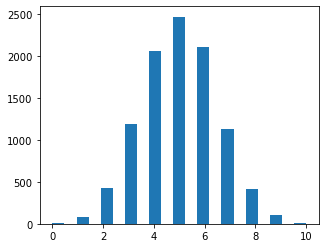

In [4]:
fig, ax = plt.subplots(figsize=(5,4))  # make one subplot (ax) on the figure
ax.hist(res,bins=21)
plt.show()

To get the probabilities instead of the frequencies we can just count the occurances of $k$ heads and divide by the number of experiments:

In [5]:
for i in range(11):
    print(i, "heads",":",res.count(i)/10000)

0 heads : 0.0007
1 heads : 0.008
2 heads : 0.043
3 heads : 0.1189
4 heads : 0.2059
5 heads : 0.2464
6 heads : 0.2107
7 heads : 0.1129
8 heads : 0.0417
9 heads : 0.0109
10 heads : 0.0009


Are these good estimates? Probably. Since that code ran very quickly we could increase the number of repetitions of the experiment without much trouble, say to 100,000 instead of 10000, and compare. But let's actually do some counting to see what the **exact** probabilities are. 

First, how many possible outcomes are there when you flip a coin 10 times? Well, on any flip there are two possible outcomes, $H$ or $T$. We can think of this as a fork in universe of all possible roads leading us to an outcome. If $H$, bear left and if $T$ bear right. Once the coin lands, we take that fork. If the coin landed $H$, and went left, then we are standing at $H$ when we flip again. That will give us another fork in the road, and so on. Each fork has two options and there are 10 forks, so there are $2^{10}$ (or 1024) possible outcomes. This is an example of the **multiplication principle**. If there are $m$ ways to perform task $A$ and $n$ ways to perform task $B$, then there are $mn$ ways to perform task $A$ followed by task $B$. If there are three meat toppings and 10 veggie topings at a pizza place, there are 30 possible pizzas with one meat and one veggie topping. 

How many ways are there to get, say, 3 heads? Well, we simply need to choose the 3 locations within the 10 flips to get heads. The order in which we choose those locations doesn't matter. Getting heads in spots 1,3 and 7 is exactly the same as getting heads in spots 3, 1, and 7. The number of ways of choosing an unordered set of $k$ objects from a group of $n$ is given by the binomial coefficient (read: $n$ choose $k$):     

$$
{n\choose k} = \frac{n!}{k!(n-k)!}.
$$

Thus, the exact probability of getting 3 heads in 10 flips is 
$$
\frac{{10\choose 3}}{2^{10}}\approx 0.1172,
$$
and more generally, the probability that teh random variable takes value $k$ is given by:
K, how about three heads in 10 flips? Think of the flips as people and choose three. Order doesn't matter (1-3-7 is the same as 3-7-1), so we can make these choices in ${10\choose 3}$ ways. Thus, the exact probability of getting 3 heads in 10 flips is 
$$
P(X=k)=\frac{{10\choose k}}{2^{k}}.
$$

We can now compare the true probabilities to the empirical probabilites. Let's define a function to compute the binomial coefficients:

In [6]:
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [7]:
for k in range(11):
    print(k, "heads",":",np.round(nCr(10,k)/2**10,4))

0 heads : 0.001
1 heads : 0.0098
2 heads : 0.0439
3 heads : 0.1172
4 heads : 0.2051
5 heads : 0.2461
6 heads : 0.2051
7 heads : 0.1172
8 heads : 0.0439
9 heads : 0.0098
10 heads : 0.001


## Conditional probability

One more important idea is that of conditional probability. Here's a simple example. Imagine rolling a pair of dice and adding the faces as in example 3 above. The possible values of the random variable (call it $Y$) are: 
$$
\{2,3,4,5,6,7,8,9,10,11,12\},
$$
though notice that these values are definitely **not** equally likely! The sample space of the experiment is given in the table above.

Now suppose I roll the dice behind a cutain, and I tell you that the result, when you sum the faces, is larger than 8. What is the probability of double sixes? Our intuition is that it should be considerably larger than the probability of rolling double sixes without the extra information.  Why? Because many of the outcomes in the sample space are ruled out when we know that the sum is more than 8. In particular, the only outcomes still in play are those where the faces sum to 9, 10, 11 or 12 (in bold in the sample space above).

Thus, the sample space has effectively shrunk to now include only $10$ possible outcomes. The new probability of getting double sixes, given the added knowledge that we rolled better than 8, is:
$$
P(\text{Double Sixes GIVEN more than 8}) = \frac{1}{10},
$$
which we abbreviate using a verticle bar instead of the word "given":
$$
P(\text{Double sixes}|\text{more than 8})=\frac{1}{10},
$$
or using the random variable
$$
P(Y=12 | Y>8)=\frac{1}{10}.
$$

In general, the probability of event $B$ happening, given that event $A$ has happened, is written:
$$
P(B|A).
$$
This is a conditional probability because it gives the probability of event $B$ conditioned on the fact that event $A$ has happened.

The dice example above gives us a template for thinking about conditional probility in general. Knowing that $A$ happened changes the sample space. Instead of all possible outcomes, the new sample space consists only of the bold outcomes in the table above. Of those, we count the outcomes in the event of interest. Thus, to find $P(B|A)$ (in the case of equally likely outcomes we can count) we are looking for outcomes in both $A$ and $B$, divided by the number of outcomes in $A$. Here's a picture

<img src="cond.jpeg">

If $A$ is the blue circle and $B$ the red, then $P(B|A)$ is the number of outcomes in the purple intersection divided by all outcomes in the blue circle. The red outcomes not shared by the blue circle are impossible because we know that $A$ has happened. 

Mathematically, 
$$
P(B|A)=\frac{P(A\bigcap B)}{P(A)},
$$
where $P(A\bigcap B)$ means the probability of both $A$ and $B$ happening at the same time. For instance, the probability that you roll a sum greater than 8 *and* double sixes. 

Now consider the experiment of flipping a coin twice. What is the probability of getting $H$ on the second flip given that we flipped $H$ on the first flip? Intuitively, we know that the answer is $\frac{1}{2}$. The knowlege that the first flip was $H$ doesn't have any effect on the outcome of the second flip. Indeed, we can write out the sample space of four possible outcomes and use the conditional probability formula to verify that our intuition is correct. In this case we say the the events $A$ ("heads on the first flip") and $B$ (heads on the second flip) are **independent**. $P(B|A)=P(B)$. 

Finally, notice that the conditional probability formula helps us compute the probability of a sequence of events:
$$
P(A\bigcap B) =P(A)\cdot P(B|A).
$$
Moreover, if $A$ and $B$ are independent then 
$$
P(A\bigcap B) =P(A)\cdot P(B).
$$
Thus, the probability of getting a particular sequence of coin flips like $HTTHT$ can be found by simply multiplying each individual probability together: $P(HTTHT)=\frac{1}{32}$.

### Complements

One other useful idea is that of the complement of an event. Given an event $A$, the complement $A^c$ is all outcomes not in the event $A$. Since $A$ together with $A^c$ is the entire sample space $S$ (and $P(S)=1$), it follows that $P(A^c)=1-P(A)$. This turns out to be quite useful. For instance, the probability of not rolling double sixes is $\frac{35}{36}$ and the probability of not flipping heads both times in two flips is $\frac{3}{4}$. Those are very simple examples where the answers were obvious, but we'll see an example below where the answer is less obvious.

## Binomial random variables

We computed the probability of getting 3 heads in 10 flips above for a fair coin. Let's revisit that calculation in a slightly more general context. Suppose we flip a coin that lands hands with probability $p$. So, this could be the magic shop coin and $p$ can be any number between 0 and 1. Let's flip the coin $n$ times and find the probability of getting $k$ heads where $k$ is between 0 and $n$. 

If we let $X$ denote the number of heads in $n$ flips, $X$ is a random varible called the **binomial random variable**. We'll find the distribution of $X$, which gives the probability that $X$ takes the value $k$ for each possible value of $k$: $P(X=k)$.  

Since each flip of the coin is independent of previous flips we can find the probability of a particular string of outcomes by multiplying the probabilities of each indiviual outcome (as shown above).  That means, for instance, that the probability getting:
$$
HHHTT
$$
can be computed as 
$$
ppp(1-p)(1-p) = p^3(1-p)^2.
$$
(Remember that the probability of $T$ is the robability of "not $H$", which is $(1-p)$.)
But the probability of getting
$$
HTHTH
$$
is also $p^3(1-p)^2$. In fact, the probability of getting 3 heads is the same no matter what order the heads come in. Thus, the probability of 3 heads in 5 flips is given by the number of ways to choose 3 of the five flips (for heads), multiplied by this probability:
$$
{5\choose 3}p^3(1-p^2).
$$

More generally:
$$
P(X=k)={n\choose k}p^k(1-p)^{n-k}.
$$
Let's see what that distribution looks like for $n=10$ and various values of $k$, and $p$.

In [8]:
bin_res=np.empty([5,11])
prob=np.arange(0.1,1,0.2)
row=0
for p in prob:
    for k in range(11):
        bin_res[row,k]= nCr(10,k)*(p**k)*(1-p)**(10-k)
    row=row+1    

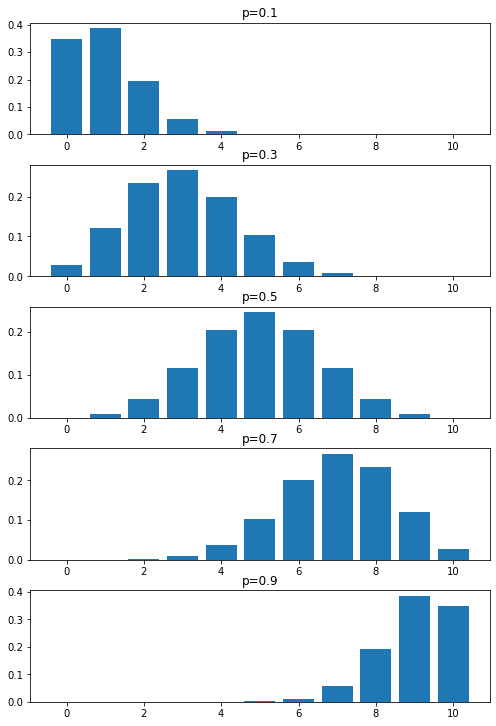

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(7,10))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector
heads=[0,1,2,3,4,5,6,7,8,9,10]
axes[0].bar(heads,bin_res[0,:])
axes[1].bar(heads,bin_res[1,:])
axes[2].bar(heads,bin_res[2,:])
axes[3].bar(heads,bin_res[3,:])
axes[4].bar(heads,bin_res[4,:])
plt.tight_layout() # I add this anytime I have a grid as it "does the right thing"
axes[0].set_title("p=0.1")
axes[1].set_title("p=0.3")
axes[2].set_title("p=0.5")
axes[3].set_title("p=0.7")
axes[4].set_title("p=0.9")
plt.show()

The binomial random variable can be considered in any situation that seems like coin flipping:
1. A fixed number of repeated independent trials (like coin flips).
2. Two possible outcomes (binary outcomes) with one arbitrarily labeled *success*.
3. Fixed probability $p$ of success on each trial.

## Uniform Random Variable

When we pick a random number between 0 and 1, we have no expectation that any particular part of the interval is more or less likely than anuy other. We moght expect, therefore, that the probability density function is uniformly distributed over the entire interval.

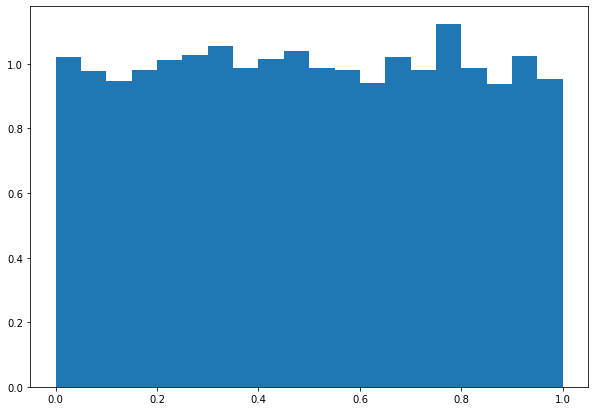

In [10]:
unif=[]
for i in range(10000):
    unif.append(random.random())
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(unif,bins=20,density=True)
plt.show()

## Mean and variance

The mean of a random variable $X$ is a measure of the the center, or average value. We compute the mean for discrete or continuous variables by summing or integrating the values of the variable's distribution weighted by the likelihood that the variable takes those values. (You can think of an integral as a continuous sum.)

$$
\mu = \sum_x x\cdot P(X=x)
$$

$$
\mu = \int xf(x)dx
$$

We are also interested in the extent to which the values of the random variable are dispersed (or spread out) around the mean. This is measured by the variance:

$$
\sigma^2=\text{var} X = \sum(x-\mu)^2\cdot P(X=x)
$$

$$
\sigma^2=\text{var } X = \int (x-\mu)^2f(x)dx
$$

As an example, consider the average monthly temperatures in Raleigh, NC, and San Francisco, CA. The averages of the monthly temperatures are are very similar. Temperatures in Raleigh, however, stray much further from the mean in summer and winter than do the temnperatures in San Francisco. Thus, the variance is greater in Raleigh.

The standard deviation $\sigma$ is the square root of the variance. It's often easier to think about becasuse the units are the same as the units of the original variable (whereas the variance is in square-units).

In [11]:
sf=pd.read_csv('NCSF.csv')

In [12]:
sf.head()

,Month,San Francisco,Raleigh
0,Jan,49,39
1,Feb,52,42
2,Mar,53,50
3,Apr,56,59
4,May,58,67


In [13]:
sf.mean()

San Francisco    57.25
Raleigh          59.25
dtype: float64

In [14]:
sf.var()

San Francisco     33.113636
Raleigh          200.750000
dtype: float64

In [15]:
sf.std()

San Francisco     5.754445
Raleigh          14.168627
dtype: float64

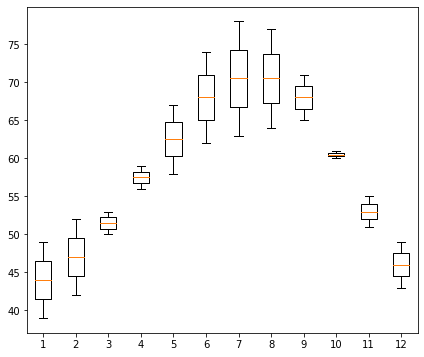

In [16]:
fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot(sf[['San Francisco','Raleigh']])
plt.show()

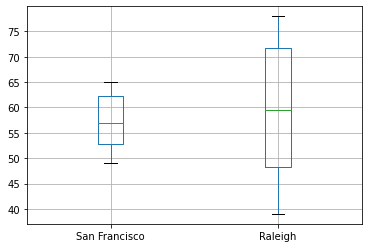

In [17]:
sf.boxplot()

The box plot shows the spread of the data using 4 numbers: the min, max, and quartiles: $Q1$, $Q2$, and $Q3$ are, respectively, the values in the distribution where 25\%, 50\%, and 75\% of the data falls below that value. $Q2$ is also known as the median. (The 25th, 50th and 75th percentiles).

Q: Compute the average and variance for bets in Roulette.

# The normal distribution

Many random variables have a symmetric, bell-shaped distribution with more values in the middle than at the extremes on either side. If you look at heights of adult men in the United States, for example, most men are close to average height, and the number of men who are very short or very tall is fairly small. In fact, you've probably heard of the normal distribution which is often used to model such variables. The normal distribution has a symmetric, bell-shaped pdf, centered at an average value  𝜇  and with standard deviation  𝜎  which determines how spread out the distribution is around  𝜇. The distribution is copletely determined by $\mu$ and $\sigma$, and we often abbreviate by writing $X \sim N(\mu,\sigma)$.

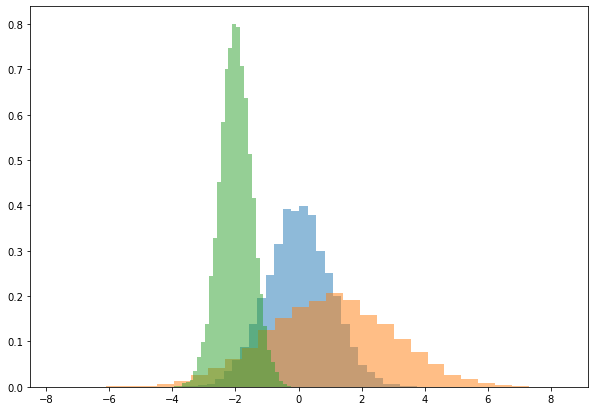

In [18]:
ndst=np.random.normal(0,1,10000)
ndst2=np.random.normal(1,2,10000)
ndst3=np.random.normal(-2,0.5,10000)
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(ndst,bins=30,alpha=0.5,density=True)
ax.hist(ndst2,bins=30,alpha=0.5,density=True)
ax.hist(ndst3,bins=30,alpha=0.5,density=True)
plt.show()

Since these are continuous random variables, the probability that the variable takes values in an interval is the area under the curve on the interval.

## An Example

Let's look at a data set consisting of internal body temperatures for a group of 130 individuals.

In [19]:
temp=pd.read_csv('normtemp.csv')
temp.head()

,temp,gender,hr
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [20]:
temp.shape

(130, 3)

Do internal body temperatures differ by gender? Let's see what our data looks like.

In [21]:
gen = sorted(temp['gender'].unique())
gen

[1, 2]

In [22]:
tempM=temp[temp['gender']==1]
tempF=temp[temp['gender']==2]

In [23]:
print(tempM.shape,tempF.shape)

(65, 3) (65, 3)


We have equal numbers of men and women.

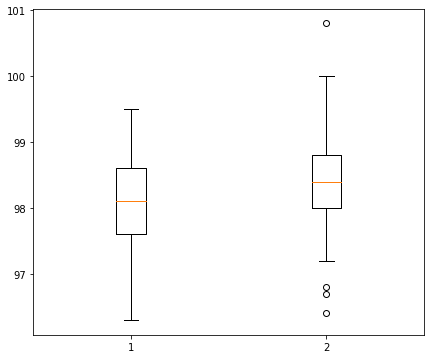

In [24]:
men=tempM['temp'].values
wom=tempF['temp'].values
fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot([men,wom])
plt.show()

It looks like the internal temperature of women is a bit higher than that of men. But the difference is small. 

In [25]:
temp[['temp','gender']].groupby('gender').mean().round(3)

,temp
gender,
1,98.105
2,98.394


In [26]:
temp[['temp','gender']].groupby('gender').std().round(3)

,temp
gender,
1,0.699
2,0.743


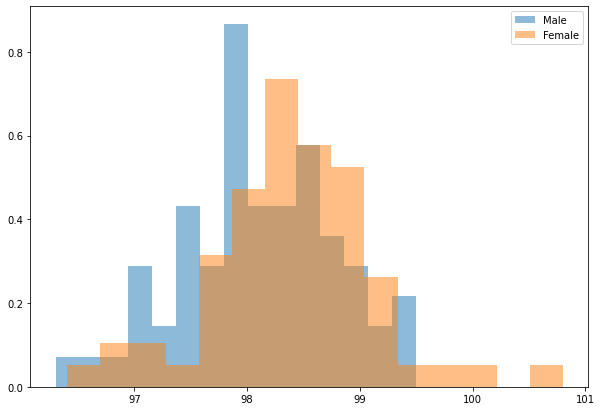

In [27]:
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(tempM['temp'],bins=15,alpha=0.5,density=True,label='Male')
ax.hist(tempF['temp'],bins=15,alpha=0.5,density=True,label='Female')
ax.legend(loc='upper right')
plt.show()

## Here's a classical statistical problem. Comparing the mean of two samples.

Does body temperature differ by gender? Moreover, is there enough data here (this **sample** of 65 men and 65 women) to answer with any confidence? 

Let's make some assumptions about the data set. In particular, we assume that the set of men, and separately the set of women, are random samples from the underlying populations (men and women). This is a big assumption. We are saying that each person in the underlying population of men/women had an equally likely chance of appearing in our samples. This is almost certainly not true. On the other hand, if we have no reason to believe that there's systematic bias in the sampling procedure, we might expect that our sample is close enough to random so as to be representative of the respective underlying populations. Of course, if we picked all 65 men from the same rural town in Sweden, and all 65 women from an elite group of marathon runners, it would clearly be the case that our samples are not representative of the underlying populations. 

## Sampling Distribution

If we could look at the populations in quesiton it would be easy to see if the average internal temperatures of the two groups is different (and by exactly how much). But we only have samples of 65 people. Obviously, had we chosen different samples, the average temperature of each sample would be slightly (or maybe not so slightly) different. Making an inference about a huge population from such a small sample of individuals seems like a daunting task.

Here's a thought experiment. Imagine taking a very large population and repeatedly drawing a sample of fixed size $n$. For each sample, compute the sample mean. Once we collect a large number of sample means, we plot the histogram and look at the distribution of values (the distribution of the sample means).  

What does the distribution of the sample means look like? Amazingly, we know the answer. No matter what the underlying population distribution looks like, the sampling distribution of the sample means will be approximately normal (as long as the sample size is large enough). As the sample size increases the approximation gets better. This result is known as the **central limit theorem**.  

Let's demonstrate this in Python.

We'll use an exponential distribution to represent the underlying population. It is clearly not normal: not bell shaped, symmetric.

In [28]:
expdst=np.random.exponential(scale=1, size=10000)

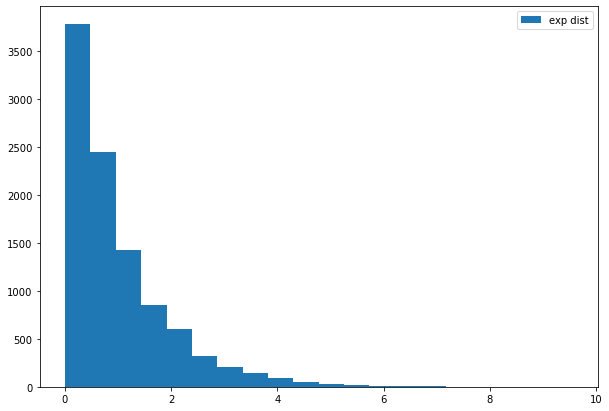

In [29]:
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(expdst,bins=20,label="exp dist")
ax.legend(loc='upper right')
plt.show()

Next, we simulate the process of repeatedly sampling from the distribution and computing the sample mean. We do this for various sample sizes, and store the results.

In [30]:
samples=np.empty([6,1000])
sizes=[10,20,30,40,50,100]
for i in range(6):
    for j in range(1000):
        samples[i,j]= np.mean(np.random.exponential(scale=1, size=sizes[i]))

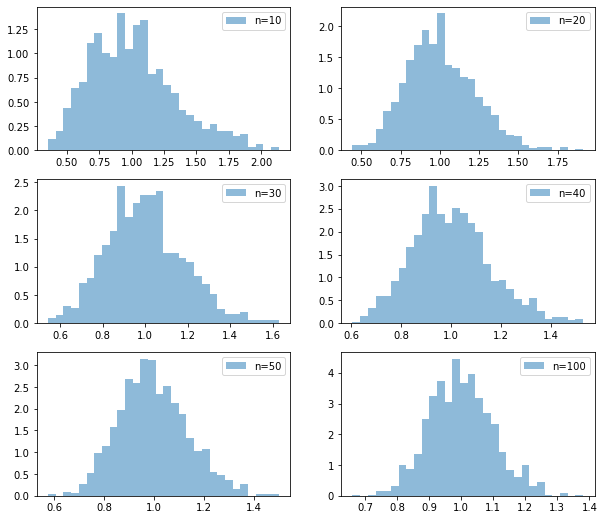

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,9))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector
axes[0].hist(samples[0,:],bins=30,alpha=0.5,density=True,label='n=10')
axes[0].legend(loc='upper right')
axes[1].hist(samples[1,:],bins=30,alpha=0.5,density=True,label='n=20')
axes[1].legend(loc='upper right')
axes[2].hist(samples[2,:],bins=30,alpha=0.5,density=True,label='n=30')
axes[2].legend(loc='upper right')
axes[3].hist(samples[3,:],bins=30,alpha=0.5,density=True,label='n=40')
axes[3].legend(loc='upper right')
axes[4].hist(samples[4,:],bins=30,alpha=0.5,density=True,label='n=50')
axes[4].legend(loc='upper right')
axes[5].hist(samples[5,:],bins=30,alpha=0.5,density=True,label='n=100')
axes[5].legend(loc='upper right')
plt.show()

Moreover, the mean of the sampling distribution ($\mu_{\overline{x}}$) has mean equal to the population mean. 
$$
\mu_{\overline{x}} =\mu.
$$

If you look closely at the distributions above, you'll notice that the standard deviation gets smaller as the sample size increases. In fact, the central limit theorem tells us by exactly how much. The standard deviation of the sampling distribution (called the *standard error of the mean*, $SE_{\overline{x}}$) is given by 
$$
SE_{\overline{x}} = \frac{\sigma}{\sqrt{n}}.
$$

One final word: note that the distributions look pretty bell shaped and symmetric starting at $n=20$ or $n=30$, even though the population distribution was very non symmetric. In general, how big the sample size needs to be depends on the population distribution. In fact, if the underlying population is normal then the sampling distribution is normal for any sample size. If the underlying distribution is not normal, but is roughly mound shaped and symmetric, then the approximation will be reasonable for smaller sample sizes. If you know nothing about the underlying distribution, $n=30$ is a good rule of thumb for the sampling distribution to be approximately normal.

## Back to body temps

We're almost ready to tackle the question of whether average body temperatures of men and women are different. The central limit theorem will let us turn this into a question about a normal distribution, but first we need one more fact.

Let $X$ be a normally distributed random variable with mean $\mu_1$ and standard deviation $\sigma_1$. We can abbreviate that $X\sim N(\mu_1,\sigma_1)$. Moreover, suppose $Y\sim N(\mu_2,\sigma_2)$. Then, the distribution of $X-Y$ is normal, with mean $\mu_1-\mu_2$ and standard deviation $\sqrt{\sigma_1^2+\sigma_2^2}$. 

## Hypothesis testing and Confidence intervals

Let's rephrase the body temperature question as folows. We have data that, not suprisingly, shows a difference between the body temperatures of men and women. But there's variability inherent in the sampling process. Maybe the difference we see is not at all unusual. In fact, maybe the difference we see is perfectly ordinary, and we would routinely see differences of this magnitude even when the samples are drawn from two groups having identical population means. 

We therefore make the following **null hypothesis**: There is no difference between average body temperatures of men and women. With that assumption made, and using the fact above along with the central limit theorem, the distribution of the difference in sample means, from samples of 65 men and women respectively, is normally distributed with mean 0. The alternative hypothesis is that there **is** a difference. We can now use the data in hand to assess the evidence against the null hypothesis. How unusual would our data be if the null hypothesis were true?

Computing probabilities in $N(\mu,\sigma)$ and $N(0,1)$: $Z\sim \frac{X-\mu}{\sigma}$ 

In $N(\mu_{\overline{x}},\sigma_{\overline{x}})$,
$$
Z\sim \frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}}
$$

Under $H_0$, in $N(\mu_{\overline{x}-\overline{y}},\sigma_{\overline{x}-\overline{x}})$ 
$$\frac{(\overline{x}-\overline{y})-0}
{\sqrt{\sigma_{\overline{x}}^2+\sigma_\overline{y}^2}} = \frac{\overline{x}-\overline{y}}
{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}
$$

In [32]:
import scipy.stats
scipy.stats.norm(0, 1).cdf(0)

0.5

In [33]:
scipy.stats.norm(0, 1).cdf(1)-scipy.stats.norm(0, 1).cdf(-1)

0.6826894921370859

In [34]:
def z(x):
    return scipy.stats.norm(0, 1).cdf(x)

In [35]:
print(z(1)-z(-1),"--",z(2)-z(-2),"--",z(3)-z(-3))

0.6826894921370859 -- 0.9544997361036416 -- 0.9973002039367398


In [36]:
data=temp[['temp','gender']].groupby('gender').mean()
datasd=temp[['temp','gender']].groupby('gender').std()

In [37]:
data

,temp
gender,
1,98.104615
2,98.393846


In [38]:
diff=data['temp'].iloc[1]-data['temp'].iloc[0]
diff

0.2892307692307554

In [39]:
datasd

,temp
gender,
1,0.698756
2,0.743488


One last problem. We don't actually know the population standard deviations. Turns out this isn't a huge problem but for now let's just assume the sample standard deviations are the same as the population standard deviations.

In [40]:
s1=datasd['temp'].iloc[1]
s2=datasd['temp'].iloc[0]

In [41]:
zscore=diff/np.sqrt((s1**2/65)+(s2**2/65))
zscore

2.2854345381654757

Thus, our difference in sample means is about 2.29 standard deviations above the mean. We can quantify how unusual this is. We simply find the probability of getting a sample mean difference as or more extreme than this one, when the null hypothesis is true. That is, if we actually do live in $N(0,1)$, how often would we get a sample mean difference more than 2.29 standard deviations from the mean simply by chance alone?  

A random value chosen from $N(0,1)$ can be 2.29 standard deviations from the mean in either direction (above or below). Thus, we find $P(Z<-2.29)+P(Z>2.29)$.

In [42]:
2*z(-2.29)

0.022021316648822776

This is the $p$-value: The probability of getting sample data as or more extreme than ours when the null hypothesis is true.

If the null hypothesis were true, sample data like ours would occur by chance about 2.2\% of the time.

That seems unlikely. (But certainly not impossible.) At this point we have to make a decision. We can either declare that this $p$-value is so small that we attrribute the unusual nature of our sample data *not* to chance, but rather to an incorrect assumption that the null hypothesis was true. Rejecting the null hypothesis means that we have given evidence that the alternative hypothesis, that there *is* a difference in body temperature between the two groups.

Ultimately, this decision is subjective. When we reject the null hypothesis, there's always a chance that we did so in error. The threshold for our willingness to be wrong is called the significance level, $\alpha$. Typically, $\alpha$ is taken to be 0.05 or 0.01, meaning that we will reject $H_0$ when we see data that would occur by chance (when $H_0$ is true) less that 5% or 1\% of the time, respectively. Of course, the significance level $\alpha$ should be set before the analysis is done.

In our analysis above, we would reject $H_0$ at the $\alpha=0.05$ level of significance (but fail to reject at $\alpha=0.01$).

## T-statistic

We made the assumption that the sample stadard deviations were equal to the population standard deviations. That's certainly not true, though the sample standard deviations are not bad estimates. If we use the sample standard deviations (write $s$ for the sample standard deviation and $\sigma$ for the population), we introduce a bit more variability into the distribution of sample means. Luckily, the extra variability can be quantified so that the resulting distribution, while no longer normal, follows another well known distribution called the student's $t$-distribution. 

Calling the $t$-distribution is more complicated but we can do so in Python:

In [43]:
m=tempM['temp']
w=tempF['temp']

Let's test the hypothesis that the means of the two groups are equal.

In [44]:
scipy.stats.ttest_ind(w,m, equal_var = False)

Ttest_indResult(statistic=2.2854345381654984, pvalue=0.023938264182940983)

This computes both the value of the t-statistic (2.285) and the $p$-value associated with the test. Note that the $p$-value is slighly larger than the one we found using the normal distribution. This is because the $t$-distribution has more variability, and more area in the tails of the distribution reflecting the added uncertainty from using the sample standard deviations as approximations.

Recall that the sample standard deviation is
$$
s=\sqrt{\frac{1}{n-1}\sum_x(x-\overline{x})^2}
$$

In [45]:
scipy.stats.tstd([1,0,-1])

1.0

In [46]:
np.std([1,0,-1])

0.816496580927726

In [47]:
tdata=np.random.normal(loc=10,scale=9,size=(10000,9))
tdst=(np.mean(tdata,axis=1)-10)/(np.std(tdata,axis=1,ddof=1)/3)
ndst=(np.mean(tdata,axis=1)-10)/3

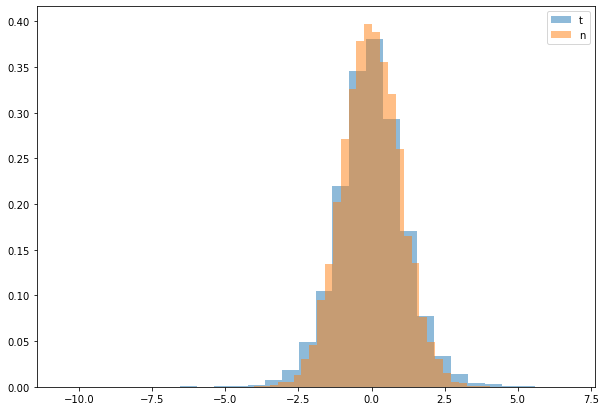

In [48]:
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(tdst,bins=30,alpha=0.5,density=True,label="t")
ax.hist(ndst,bins=30,alpha=0.5,density=True,label="n")
ax.legend(loc='upper right')
plt.show()

In [49]:
print("P(t>1)=",sum(tdst>1)/10000,":","P(Z>1)=",sum(ndst>1)/10000)

P(t>1)= 0.1721 : P(Z>1)= 0.1527


As sample size increases, the $t$-distribution gets closer to the standard normal distribution.

We can compute areas in the t-distribution using the cdf.

```stats.t.cdf(x,df)``` gives $P(t<x)$ with df degrees of freedom.

In [50]:
scipy.stats.t.cdf(0, 5)

0.5

In [51]:
scipy.stats.t.cdf(2, 5)

0.9490302605850709

In [52]:
scipy.stats.t.cdf(2, 10)

0.9633059826146297

You can also compute confidence intervals. I'm getting tired of typing ```scipy.stats.t``` so let's shorten it:

In [53]:
from scipy.stats import t 

Now, the interval function ```t.interval(pct,df)``` gives the endpoints of the interval with $pct$ area under the t-distribution between those values (with df degrees of freedom): 

In [54]:
t.interval(0.95, 10)

(-2.2281388519649385, 2.2281388519649385)

In [55]:
scipy.stats.t.cdf(2.22814, 10)-scipy.stats.t.cdf(-2.22814, 10)

0.9500000973169969

Hence, if you wanted a $95\%$ cofidence interval for the mean body temp of men:

In [56]:
mt=tempM.temp.mean()
n=len(tempM)
s=tempM.temp.std()

In [57]:
print("(",mt+t.interval(0.95, n-1)[0]*s/np.sqrt(n),mt+t.interval(0.95, n-1)[1]*s/np.sqrt(n),")")

( 97.93147218445705 98.27775858477375 )


If we had the same mean but a sample of only 10 instead of 65 men, the interval would be wider: (now df=9)

In [58]:
print("(",mt+t.interval(0.95, 9)[0]*s/np.sqrt(n),mt+t.interval(0.95, 9)[1]*s/np.sqrt(10),")")

( 97.9085542560702 98.60447514476988 )


You can also generate random samples from the t-dist:

In [59]:
r = t.rvs(8, size=1000)

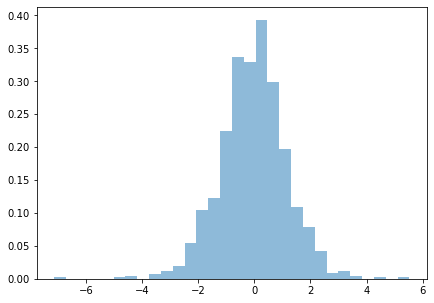

In [60]:
fig, ax = plt.subplots(figsize=(7,5))  # make one subplot (ax) on the figure
ax.hist(r,bins=30,alpha=0.5,density=True)
plt.show()

## Bootstrapping

Let's say we were in a situation where the CLT was not helpful. Maybe we are looking at the distribution of something other than a sample mean, for instance. In that case, we may not know anything about the underlying distribution. 

As an example, imagine we *didn't* know about the CLT but still wanted to estimate the distribution of the difference in mean internal body temperature between  men and women. 

One option is to take advantage of the computer to simulate the sampling distribution.

This is the idea of bootstrapping: treat the sample as the population and repeatedly re-sample with replacement.

In [117]:
temp.head()

,temp,gender,hr
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


In [118]:
tempM=temp

In [119]:
boot=[]
s_meanM = tempM.temp.mean()
s_meanF = tempF.temp.mean()
s_diff=s_meanF - s_meanM
for i in range(1000):
    tmpM=tempM.sample(frac=1,replace=True)
    tmpF=tempF.sample(frac=1,replace=True)
    diff=tmpF['temp'].mean()-tmpM['temp'].mean()
    boot.append(s_diff - diff)

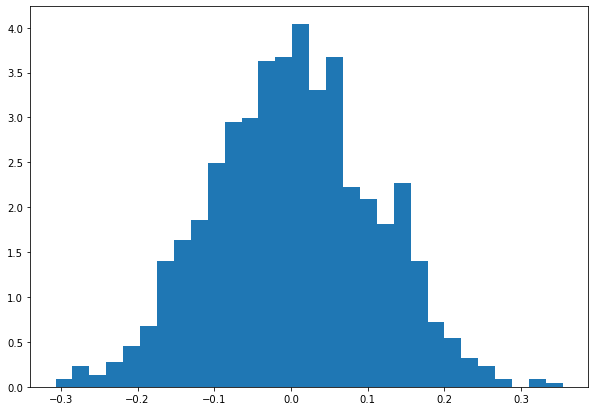

In [120]:
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(boot,bins=30,density=True)
plt.show()

In [121]:
np.mean(np.array(boot))

0.0031146153846311224

The above approximates the variability in the distribution of the difference in the sample means by resampling, and using the actual sample means to approximate the population means.

In [122]:
low=np.round(np.percentile(np.array(boot),2.5),4)
high=np.round(np.percentile(np.array(boot),97.5),4)
print("95 pct CI:","(",low,high,")")

95 pct CI: ( -0.197 0.2062 )


In [123]:
print(s_meanF-s_meanM - high, s_meanF-s_meanM - low)

-0.06158461538460808 0.3416153846153919


It's slightly less convenient to do a confidence interval for teh difference in two means using scipy. Instead, we can use the statsmodels package. (This uses the Welch confidence interval and does the ugly df calculation automatically.) 

In [124]:
import statsmodels.stats.api as sms

In [125]:
cm = sms.CompareMeans(sms.DescrStatsW(tempF.temp), sms.DescrStatsW(tempM.temp))
cm.tconfint_diff(usevar='unequal')

(-0.07786044276036494, 0.3670912119911488)

Compare to the bootstrapped confidence interval above. Very close! Note that neither this interval nor the bootstrapped interval include 0. Why does that make sense given the result of the hypothes test we performed above? Here it is again:

In [126]:
scipy.stats.ttest_ind(w,m, equal_var = False)

Ttest_indResult(statistic=2.2854345381654984, pvalue=0.023938264182940983)

## Exercises

1. Compare the value of the 97th percentile in the standard normal distribution to the corresponding 97th percentile in the $t$-distribution for various values of the sample size and df. At what sample size do the values become nearly indentical? 
2. Use the bootstrap to give a $95\%$ confidence interval for the *median* internal body temperatures of the F group.
3. Is there evidence that the average heart rates differ between the two groups? (Heart Rate was the other column in the ```temp``` data frame.) Find a 95% confidence interval for the true difference of the mean heart rates.
4. What is the result of testing the hypothesis that the mean body temps of men and women are equal at the $\alpha=0.01$ level of significance? 
5. Now use the code above to bootstrap a 99% confidence interval for the difference in the means. Does the result align with your answer in 4?
6. Does the temperature data for SF and Raleigh provide evidence that the true mean annual temperatures of the two cities differs? 

## More/Extra data and visualizations

In [127]:
cars=pd.read_csv('morecars.csv')
cars.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [128]:
cars.describe()

,Unnamed: 0,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,198.000000,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,114.748275,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,0.000000,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,99.000000,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,198.000000,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,297.000000,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,396.000000,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [129]:
# avg_mpg = cars.groupby('cylinders').mean()['mpg']
# avg_mpg

In [130]:
# cyl=sorted(cars['cylinders'].unique())
# cyl

In [131]:
# fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure
# ax.bar(cyl,avg_mpg)
# plt.show()

In [132]:
# cyl4=cars[cars['cylinders']==4]['mpg']
# cyl5=cars[cars['cylinders']==5]['mpg']
# cyl6=cars[cars['cylinders']==6]['mpg']
# cyl8=cars[cars['cylinders']==8]['mpg']
# fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure
# ax.boxplot([cyl4,cyl5,cyl6,cyl8])
# plt.show()

In [133]:
# fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure
# ax.scatter(cars['weight'], cars['mpg'])
# plt.show()

In [134]:
# fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure
# ax.scatter(cars['ENG'],cars['mpg'])
# plt.show()

In [135]:
# fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure
# ax.scatter(cars['ENG'],cars['weight'])
# plt.show()

Color maps map values in 0..1 to colors along a spectrum identified by the colormap. That means we need to convert values in the range of our data to 0..1, and the library provides a normalization function for this. Here is how we convert the MPG column to colors:

In [136]:
# # map higher values of mpg to redder colors
# from matplotlib import colors 
# cmap = plt.get_cmap('coolwarm')
# norm = colors.Normalize(cars['mpg'].min(), cars['mpg'].max()) 
# normed = norm(cars['mpg'])
# ycolors = cmap(normed)

In [137]:
# fig, ax = plt.subplots(figsize=(6,5))
# # Get a value between 0 and 1 for each Y value as a color along a spectrum
# crange = np.linspace(0,1,num=len(cars))

# ax.scatter(cars['WGT'], cars['MPG'], c=ycolors, s=20, alpha=.4)
# ax.set_xlabel("Weight")
# ax.set_ylabel("MPG")
# plt.show()

<b>Exercises</b>

1. Compare the value of the 97th percentile in the standard normal distribution to the corresponding 97th percentile in the $t$-distribution for various values of the sample size and df. At what sample size do the values become nearly indentical? 
2. Use the bootstrap to give a 95% confidence interval for the *median* internal body temperatures of the F group.
3. Is there evidence that the average heart rates differ between the two groups? (Heart Rate was the other column in the ```temp``` data frame.) Find a 95% confidence interval for the true difference of the mean heart rates.
4. What is the result of testing the hypothesis that the mean body temps of men and women are equal at the $\alpha=0.01$ level of significance? 
5. Now use the code above to bootstrap a 99% confidence interval for the difference in the means. Does the result align with your answer in 4?
6. Does the temperature data for SF and Raleigh provide evidence that the true mean annual temperatures of the two cities differs? 

<b>Question #1</b>

Compare the value of the 97th percentile in the standard normal distribution to the corresponding 97th percentile in the $t$-distribution for various values of the sample size and df. At what sample size do the values become nearly indentical? 

<b>OR:</b>
Compare the value of the 97th percentile in the standard normal distribution to the corresponding 97th percentile in the t-distribution for various values of the df. At what value of df do the values become nearly identical?

In [138]:
from scipy.stats import t

In [139]:
# Interval of normal distribution in the 97th percentile. 
# ppf - probability density function of normal distribution
scipy.stats.norm.ppf(0.97)

1.8807936081512509

In [140]:
# Now find p-value for degrees of freedom where the percentile is closest to z-value. 
t.ppf(0.97,50000)

1.8808362785283528

About df=50000 would be required in order for the t-distribution to match the normal distribution of the 97th percentile.

<b>Question #2</b>

Use the bootstrap to give a 95% confidence interval for the *median* internal body temperatures of the F group.

In [141]:
# tempF contains all data from temperature from females in sample
tempF

,temp,gender,hr
65,96.4,2,69
66,96.7,2,62
67,96.8,2,75
68,97.2,2,66
69,97.2,2,68
...,...,...,...
125,99.3,2,68
126,99.4,2,77
127,99.9,2,79
128,100.0,2,78


In [142]:
# mean body temperature of F group
tempF.temp.mean()

98.39384615384616

In [143]:
# Mean heart rate (hr) of F group
tempF.hr.mean()

74.15384615384616

In [144]:
# Median of group F body temperatures
tempF.temp.median()

98.4

In [148]:
# Median of group F hr (lines 98,99,100: hr are 81,73,74, respectively, then take mean of 3)
tempF.hr.median()

76.0

In [149]:
np.median(np.array(boot))

0.0038461538461334044

In [150]:
med_diff = tempF.temp.median() - tempF.temp.mean()

In [151]:
# Find a low and high for the 95% confidence interval of median body temps, group F
# Take into account the three heart rates' mean tied to the 98.4 median temperature
low=np.round(np.percentile(np.array(boot),2.5),3)
high=np.round(np.percentile(np.array(boot),97.5),3)
print("95 pct CI:","(",low,high,")")

95 pct CI: ( -0.197 0.206 )


In [152]:
# Return the CI with respect to the median group F body temp
print(med_diff-high, med_diff-low)

-0.1998461538461496 0.2031538461538504


<b>Question #3</b>

Is there evidence that the average heart rates differ between the two groups? (Heart Rate was the other column in the temp data frame.) Find a 95% confidence interval for the true difference of the mean heart rates.

In [153]:
tempM=temp[temp['gender']==1]
tempF=temp[temp['gender']==2]

In [155]:
# Return mean heart rates for group M (males) and group F (females)
# Total: 130 in sample taken - 65 male and 65 female
print("M mean hr:", tempM.hr.mean(), "\nF mean hr:", tempF.hr.mean())

M mean hr: 73.36923076923077 
F mean hr: 74.15384615384616


In [156]:
# General difference: mean hr of group F is greater in BPM prior to 95% CI implemented
hrdiff = tempF.hr.mean()-tempM.hr.mean()
hrstd = tempF.hr.std()-tempM.hr.std()
print("Pre-CI hr difference:", hrdiff, 
      "\nStandard Deviation of Diff:", hrstd)

Pre-CI hr difference: 0.7846153846153925 
Standard Deviation of Diff: 2.23004329902584


In [157]:
# z = 1.96, n = 130
# Return true difference of mean heart rates with respect to z-score
lowhr = hrdiff - 1.96*(hrstd/math.sqrt(130))
hihr = hrdiff + 1.96*(hrstd/math.sqrt(130))
print(lowhr, hihr)

0.40126342228813927 1.1679673469426457


Yes, there is some evidence on this sample that the average heart rate differs between both M and F groups. Based on the difference pre-confidence interval calculations, group F's mean heart rate was approximately 0.785 beats per minute more than group M's heart rate. If there was a null hypothesis $H_0$ where there was no difference in heart rate (or difference was 0), then we would reject $H_0$ where group F's heart rate is more than that of group M's. 

<b>Question #4</b>

What is the result of testing the hypothesis that the mean body temps of men and women are equal at the a=0.01 level of significance? 

In [158]:
scipy.stats.norm(0,1).cdf(0)

0.5

In [159]:
print(z(1)-z(-1),"--",z(2)-z(-2),"--",z(3)-z(-3))

0.6826894921370859 -- 0.9544997361036416 -- 0.9973002039367398


In [160]:
# Means of M, F groups' body temperatures, respectively
mmean = m.mean()
wmean = w.mean()
bothmean = temp.temp.mean()
print(mmean,wmean,bothmean, "\ndiff m from f:",mmean-wmean,
     "\ndiff from m to mean:", bothmean - mmean,
        "\ndiff from mean to f:", wmean - bothmean)

98.1046153846154 98.39384615384616 98.24923076923076 
diff m from f: -0.2892307692307554 
diff from m to mean: 0.1446153846153635 
diff from mean to f: 0.14461538461539192


In [161]:
# Calculate z-score with respect to both groups
z_val= (mmean-wmean)/np.sqrt((tempM.temp.std()**2/65) + (tempF.temp.std()**2/65))
z_val

-2.2854345381654997

In [162]:
# Plug into z-function provided earlier in file to determine probability to check hypothesis
1 - z(z_val)

0.988856319619668

The 99% confidence interval (when $\alpha = 0.01$) should be if $z=2.576$

In [163]:
z(2.576)

0.995002467684265

Since $1 - z(z_{val}) \neq z(2.576)$, we reject the hypothesis $H_0$ that the mean body temeperatures of men and women are equal at the $\alpha=0.01$ level of significance. The male mean body temperature is less than the female mean body temperature, which would be the alternative hypothesis $H_a$.

<b>Question #5</b>

Now use the code above to bootstrap a $99\%$ confidence interval for the difference in the means. Does the result align with your answer in 4?

In [164]:
# Create a low and high variable using bootstrap with value of df = 64

low_diff = np.round(np.percentile(np.array(boot), 0.005), 4)
hi_diff = np.round(np.percentile(np.array(boot), 0.995), 4)

print("99 pct CI:", "(",low_diff,",",hi_diff,")")

99 pct CI: ( -0.3062 , -0.2383 )


Yes, the results here align with Question 4 that there is a  difference in mean body temps with the use of a 99% confidence interval. In this case, the male mean body temperature is less than the female mean body temperature, which would be the alternative hypothesis $H_a$. 

<b>Question #6</b>

Does the temperature data for SF and Raleigh provide evidence that the true mean annual temperatures of the two cities differs?

In [168]:
sf.all

<bound method DataFrame.all of    Month  San Francisco  Raleigh
0    Jan             49       39
1    Feb             52       42
2    Mar             53       50
3    Apr             56       59
4    May             58       67
5    Jun             62       74
6    Jul             63       78
7    Aug             64       77
8    Sep             65       71
9    Oct             61       60
10   Nov             55       51
11   Dec             49       43>

In [169]:
sf.head()

,Month,San Francisco,Raleigh
0,Jan,49,39
1,Feb,52,42
2,Mar,53,50
3,Apr,56,59
4,May,58,67


In [170]:
sf.tail()

,Month,San Francisco,Raleigh
7,Aug,64,77
8,Sep,65,71
9,Oct,61,60
10,Nov,55,51
11,Dec,49,43


In [173]:
sf.mean()

San Francisco    57.25
Raleigh          59.25
dtype: float64

In [176]:
# Difference of mean temps of SF/Raleigh show that Raleigh is 2 degrees warmer per year
diff = sf["Raleigh"].mean() - sf["San Francisco"].mean()
diff

2.0

Yes, the temperature data for SF and Raleigh show that the true mean annual temperature of the two cities differs.